In [19]:
import torch
torch.__version__

'1.13.1+cpu'

In [20]:
from torch.utils.data import Dataset, DataLoader
# transforms 전처리 때 사용하는 메소드

MNIST 데이터셋 가져오기

In [21]:
import torchvision.transforms as transforms
from torchvision import datasets

In [22]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=(0.5,),std=(1.0,))])

In [23]:
trainset = datasets.MNIST(root=r'C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛',
                          train=True, download=True, transform=mnist_transform)

In [24]:
testset = datasets.MNIST(root=r'C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛',
                          train=False, download=True, transform=mnist_transform)

In [25]:
# 배치만큼 데이터 가지고 오기
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)

In [26]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape
# 28 x 28 이미지, 이미지 커널 1개이므로 흑백, batch size = 8

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [27]:
# 이미지 차원 축소, 0차원 축소 => 8개 배치 데이터 중 한 개만 가져옴
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

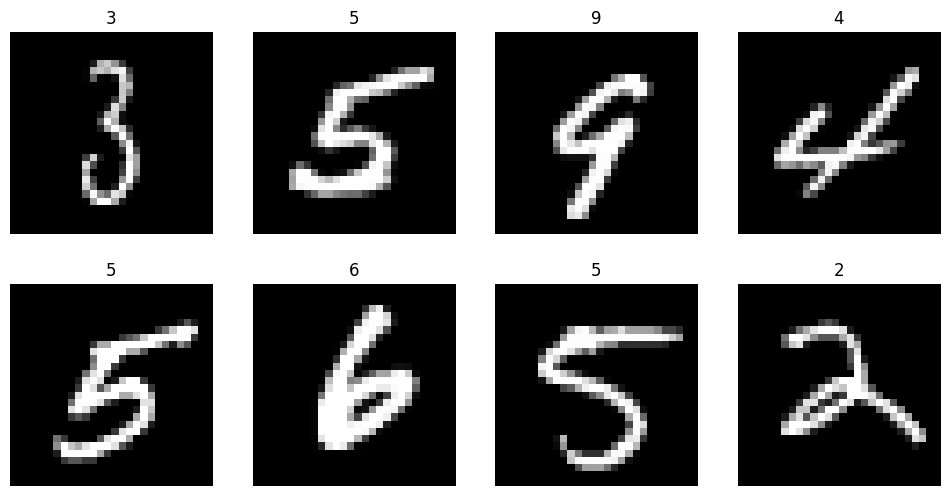

In [28]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6))
cols, rows = 4, 2
for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(trainset),size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray') # img.squeeze()를 통해 차원을 2차원을 맞춰줘야 한다.
plt.show()

신경망 구성
layer : 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
module : 한 개 이상의 계층이 모여서 구성
model : 한 개 이상의 모듈이 모여서 구성

torch.nn 패키지
가중치와 편향값들이 내부에서 자동으로 생성되는 레이어를 사용할 때 이용한다.

In [29]:
import torch.nn as nn
import torch

In [30]:
# 예제
input = torch.randn(128,20)
print(input)

m = nn.Linear(20,30)
print(m)

output = m(input)
print(output.size())

tensor([[-1.4698,  0.7711,  0.7055,  ..., -0.9698,  0.2457,  0.8929],
        [-0.4836, -0.1857, -0.7432,  ..., -0.4165, -0.0866,  0.3535],
        [ 0.9742,  0.9144,  0.4532,  ..., -0.9713, -0.1153, -0.7131],
        ...,
        [ 0.7910,  0.9002,  1.3761,  ...,  0.5175, -0.1890, -0.8565],
        [-1.0853,  0.6252,  0.5511,  ...,  1.7487, -1.3597,  0.2430],
        [-0.6097,  0.3978,  1.2296,  ...,  0.1759,  0.6086,  0.2838]])
Linear(in_features=20, out_features=30, bias=True)
torch.Size([128, 30])


In [31]:
# 컨볼루션 예제
input = torch.randn(20,16,50,100)
m = nn.Conv2d(16,33, 3, stride=2)
m = nn.Conv2d(16,33, (3,5), stride=(2,1),padding=(4,2))
m = nn.Conv2d(16,33, (3,5), stride=(2,1), padding=(4,2), dilation=(3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [32]:
output = m(input)
output.size()

torch.Size([20, 33, 26, 100])

In [33]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [34]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))

In [35]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [36]:
# weight는 detach()를 통해 꺼내줘야 numpy() 변환 가능

weight = weight.detach()

In [37]:
# numpy() 변환 가능
weight = weight.numpy()

In [55]:
import numpy as np
np.squeeze(weight[0]).shape

(5, 5)

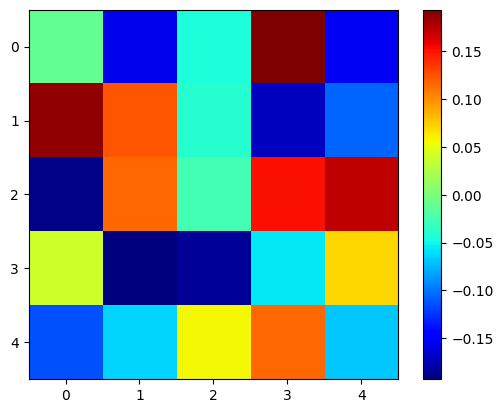

In [38]:
# 컨볼루션 계층 하나의 weight 값을 가져와서 컬러로 표현
from matplotlib import pyplot as plt
plt.imshow(weight[0,0,:,:],'jet')   # 5 x 5 만 선택, 'jet' : 컬러
plt.colorbar()
plt.show()

In [39]:
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
input_image.size()

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])


torch.Size([28, 28])

In [41]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size())    # 1 1 28 28

output_data = layer(input_data) # layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
print('output_data', output_data.shape)   # 객체로 grad도 포함되어있음
output = output_data.data       # data값만 가져옴, shape 일치
print('output', output.shape)
output_np = output.numpy()
output_np.shape

torch.Size([1, 1, 28, 28])
output_data torch.Size([1, 20, 24, 24])
output torch.Size([1, 20, 24, 24])


(1, 20, 24, 24)

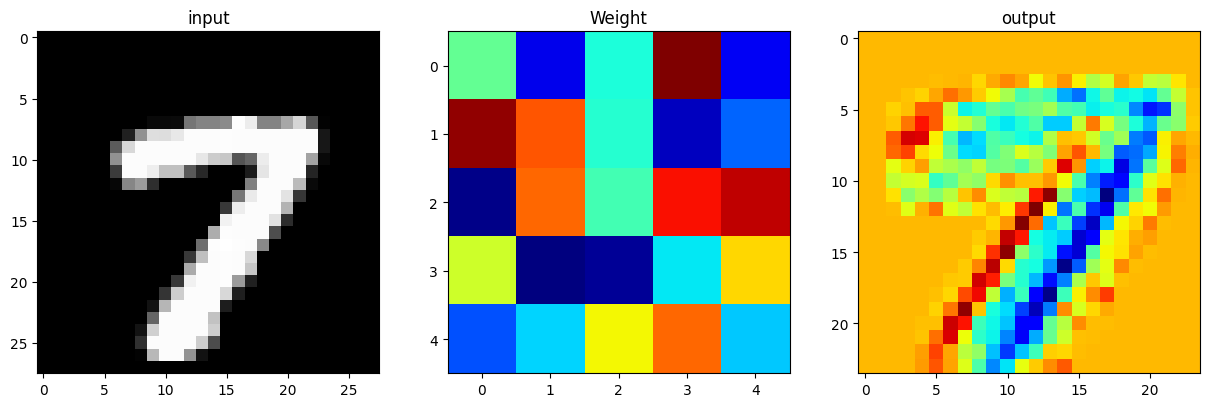

In [60]:
plt.figure(figsize=(15,30))

plt.subplot(131)
plt.title('input')
plt.imshow(input_image, 'gray')    # input_image: 28,28
# print(input_image.shape)

plt.subplot(132)
plt.title('Weight')
# plt.imshow(np.squeeze(weight[0]), 'gray')
plt.imshow(weight[0,0,:,:], 'jet')     # 뒤의 것만 쓰겠다.

plt.subplot(133)
plt.title('output')
plt.imshow(output[0,0,:,:],'jet')

In [62]:
# 풀링 계층
import torch.nn.functional as F

pool = F.max_pool2d(output,2,2)
output.shape, pool.shape        # 2x2 이므로 반쪽이 되었음을 확인할 수 있다.

(torch.Size([1, 20, 24, 24]), torch.Size([1, 20, 12, 12]))

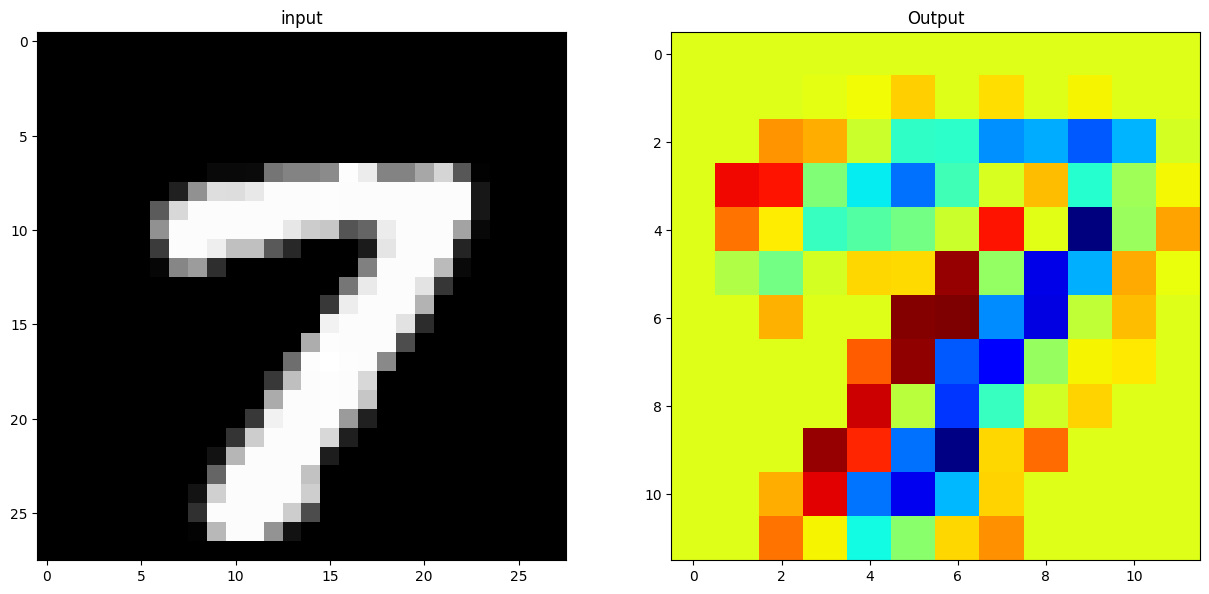

In [64]:
plt.figure(figsize=(15,30))

plt.subplot(121)
plt.title('input')
plt.imshow(input_image, 'gray')    # input_image: 28,28
# print(input_image.shape)

plt.subplot(122)
plt.title('Output')
# plt.imshow(np.squeeze(weight[0]), 'gray')
plt.imshow(pool[0,0,:,:], 'jet')     # 뒤의 것만 쓰겠다.


In [65]:
# 선형 레이어 (Linear layers)
flatten = input_image.view(1,28*28)
flatten.shape

torch.Size([1, 784])

In [68]:
lin = nn.Linear(784,10)(flatten)
lin.shape

torch.Size([1, 10])

In [69]:
lin

tensor([[-0.2105, -0.6277,  0.4226,  0.0924, -0.5592, -0.1351, -0.0680, -0.3101,
          0.2828,  0.1357]], grad_fn=<AddmmBackward0>)

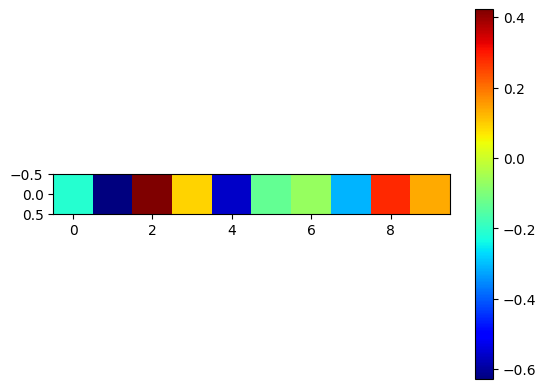

In [73]:
plt.imshow(lin.detach(),'jet')
plt.colorbar()

In [74]:
# 비선형 활성화
with torch.no_grad():
    flatten = input_image.view(1,28*28)
    lin = nn.Linear(784,10)(flatten)
    softmax = F.softmax(lin, dim=1)
softmax

tensor([[0.0822, 0.1267, 0.0856, 0.1227, 0.0614, 0.0898, 0.0975, 0.1527, 0.0761,
         0.1054]])

In [77]:
torch.argmax(softmax) # 7번이 가장 높다.

tensor(7)

In [78]:
# 렐루
inputs = torch.randn(4,3,28,28)
layer = nn.Conv2d(3,20,5,1)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

In [79]:
# 모델 정의, nn.Module

# nn.Module
# __init__()
# forward()

In [80]:
class Model(nn.Module):
    def __init__(self, inputs):
        super(Model, self).__init__()
        self.layer = nn.Linear(inputs,1)
        self.activation = nn.Sigmoid()
    
    def forward(self,x):
        x = self.layer(x)
        x = self.activation(x)
        return x

In [83]:
# Linear, Sigmoid() 계층이 있다는 것을 Children을 통해 알 수 있다.
model = Model(1)
print(list(model.children()))
print(list(model.modules()))

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


In [85]:
# 신경망 정의
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
                                    nn.ReLU(inplace=True),
                                    nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
                                    nn.ReLU(inplace=True),
                                    nn.MaxPool2d(2))
        self.layer3 = nn.Sequential(nn.Linear(in_features=30*5*5, out_features=10, bias=True),
                                    nn.ReLU(inplace=True),
                                    nn.MaxPool2d(2))
        def forward(self,x):
            x = self.layer1(x)
            x = self.layer2(x)
            x = x.view(x.shape[0],-1)       # reshape 역할
            x = self.layer3(x)
            return x

In [86]:
# 모델 파라미터

# 손실함수

# torch.nn.BCELoss : 이중분류(Binary classification)
# torch.nn.CrossEntropyLoss : 다중분류
# torch.nn.MSELoss : 회귀모델

In [87]:
criterion = nn.MSELoss()
criterion2 = nn.CrossEntropyLoss()

In [88]:
# 옵티마이져(Optimizer)

# 손실함수 기반으로 모델이 어떻게 업데이트 되어야 하는지 결정
# step() 을 통한 모델 업데이트
# torch.optim.Optimizer(params, default) 클래스 사용
# zero_grad()를 이용해 기울기 0으로 설정
# torch.optim.lr_scheduler: epoch에 따라 lr(학습률) 조절
# 주요 옵티마이져 : optim.Adadelta, optim.Adagrad, optim.Adam, optim.RMSprop, optim.SGD

In [89]:
# 학습률 스케줄러 : torch.optim.lr_scheduler
# 학습시 특정 조건에 따라 학습률 조정하며 최적화 진행
# 일정 횟수 이상 되면 학습률을 감소시키거나 최소점 근처에 가면 학습률을 줄이는 등 가능케 함


In [90]:
# 지표(Metrics)

!pip install torchmetrics

     ------------------------------------- 512.4/512.4 kB 10.7 MB/s eta 0:00:00


In [91]:
import torchmetrics

preds = torch.randn(10,5).softmax(dim=-1)
target = torch.randint(5,(10,))
print(target.shape)
print(preds, target)

torch.Size([10])
tensor([[0.2976, 0.0343, 0.2009, 0.1918, 0.2754],
        [0.0300, 0.5180, 0.1089, 0.2918, 0.0513],
        [0.1467, 0.2088, 0.1471, 0.2780, 0.2195],
        [0.2871, 0.3076, 0.1214, 0.0639, 0.2200],
        [0.1317, 0.2307, 0.1431, 0.1599, 0.3346],
        [0.2734, 0.1293, 0.3579, 0.1464, 0.0930],
        [0.1216, 0.4094, 0.1795, 0.1232, 0.1662],
        [0.1688, 0.1322, 0.3650, 0.2640, 0.0701],
        [0.0995, 0.3685, 0.1282, 0.0942, 0.3097],
        [0.2888, 0.0296, 0.2940, 0.2295, 0.1582]]) tensor([0, 3, 0, 0, 0, 4, 4, 3, 0, 1])


In [94]:
# 정확도 직접 구하기
(torch.argmax(preds ,dim=1) == target).float().mean()

tensor(0.1000)

In [97]:
# torchmetrcis.Accuracy 모듈 사용하기
metric = torchmetrics.Accuracy(task="multiclass",num_classes=5)
metric(preds,target)

tensor(0.1000)

In [98]:
# 선형 회귀 모델(LinearRegression Model)

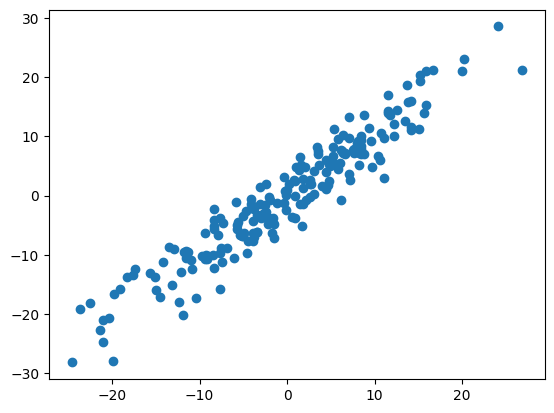

In [99]:
# 데이터 생성
X = torch.randn(200,1)*10
y = X+3*torch.randn(200,1)
plt.scatter(X.numpy(), y.numpy())
plt.show()

In [101]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.lin = nn.Linear(1,1)
    def forward(self,x):
        pred = self.lin(x)
        return pred

In [124]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (lin): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.9565]], requires_grad=True), Parameter containing:
tensor([-0.5030], requires_grad=True)]


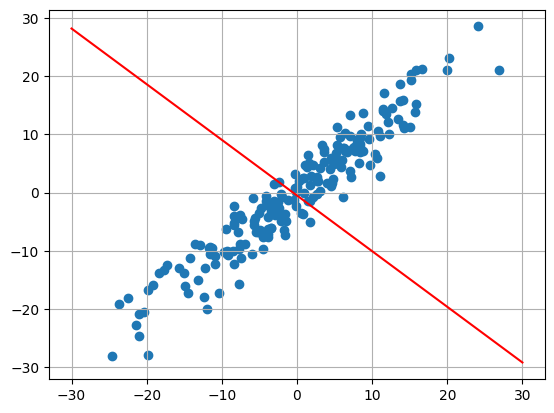

In [125]:
w,b = model.parameters()
w1,b1 = w[0].item(), b[0].item()
x1 = np.array([-30,30])     # x좌표 2개
y1 = x1*w1 + b1             # y좌표 2개
plt.plot(x1,y1,'r')         # 선 긋기
plt.scatter(X,y)
plt.grid()
plt.show()

In [126]:
from torch import optim
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [127]:
epochs = 100
losses = []

for epoch in range(epochs):
    # X,y : 200x1
    pred = model(X)
    loss = criterion(pred,y)
    losses.append(loss.item())  # loss는 tensor 값이므로 item()을 이용해서 상수만 뽑아온다.
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


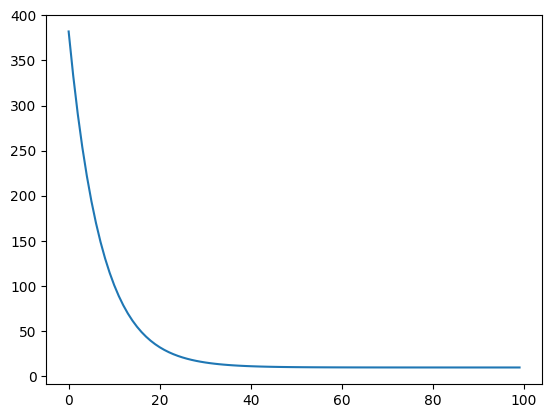

In [128]:
plt.plot(range(len(losses)),losses)
plt.show()

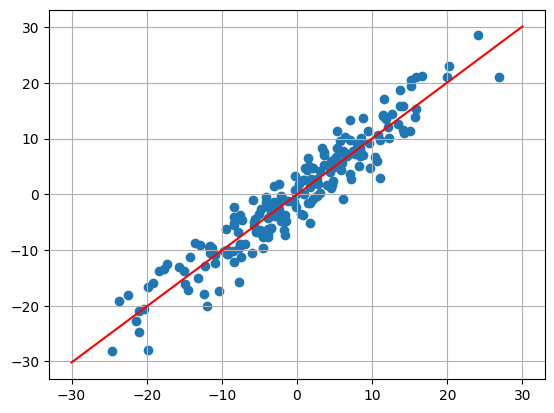

In [129]:

w1,b1 = w[0].item(), b[0].item()       # item()으로 상수만 가져올 수 있다.
x1 = np.array([-30,30])     # x좌표 2개
y1 = x1*w1 + b1             # y좌표 2개
plt.plot(x1,y1,'r')         # 선 긋기
plt.scatter(X,y)
plt.grid()
plt.show()

In [130]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [131]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5))])   # mean:0.5, std:0.5


In [133]:
trainset = datasets.FashionMNIST(root=r'C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛',
                                 train=True, download=True,
                                 transform=transform)   # Tensor()로 바꾸고 mean,std = 0.5
testset = datasets.FashionMNIST(root=r'C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛',
                                 train=False, download=True,
                                 transform=transform)


100%|██████████| 26421880/26421880 [00:14<00:00, 1880876.43it/s]


Extracting C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 111675.42it/s]


Extracting C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1521303.30it/s]


Extracting C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\FashionMNIST\raw



In [134]:
# DataLoader()로 배치로 나눠주기 
train_loader = DataLoader(trainset, batch_size=128, shuffle=True,num_workers=2)
test_loader = DataLoader(testset, batch_size=128, shuffle=False,num_workers=2)
# num_worker는 어떤 역할을 할까? => gpu, cpu 할당하는 역할

In [135]:
# next(iter())하면 리스트에 있는 값을 하나씩 꺼내온다는 의미
# 즉 여기서는 첫번째 배치에 해당
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

tensor(8)


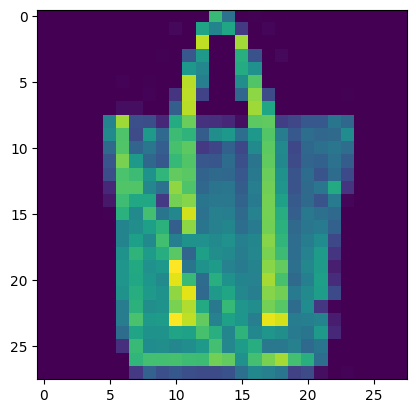

In [138]:
# plot 선, scatter 점, imshow 그림
plt.imshow(images[0,0,:,:])
print(labels[0])

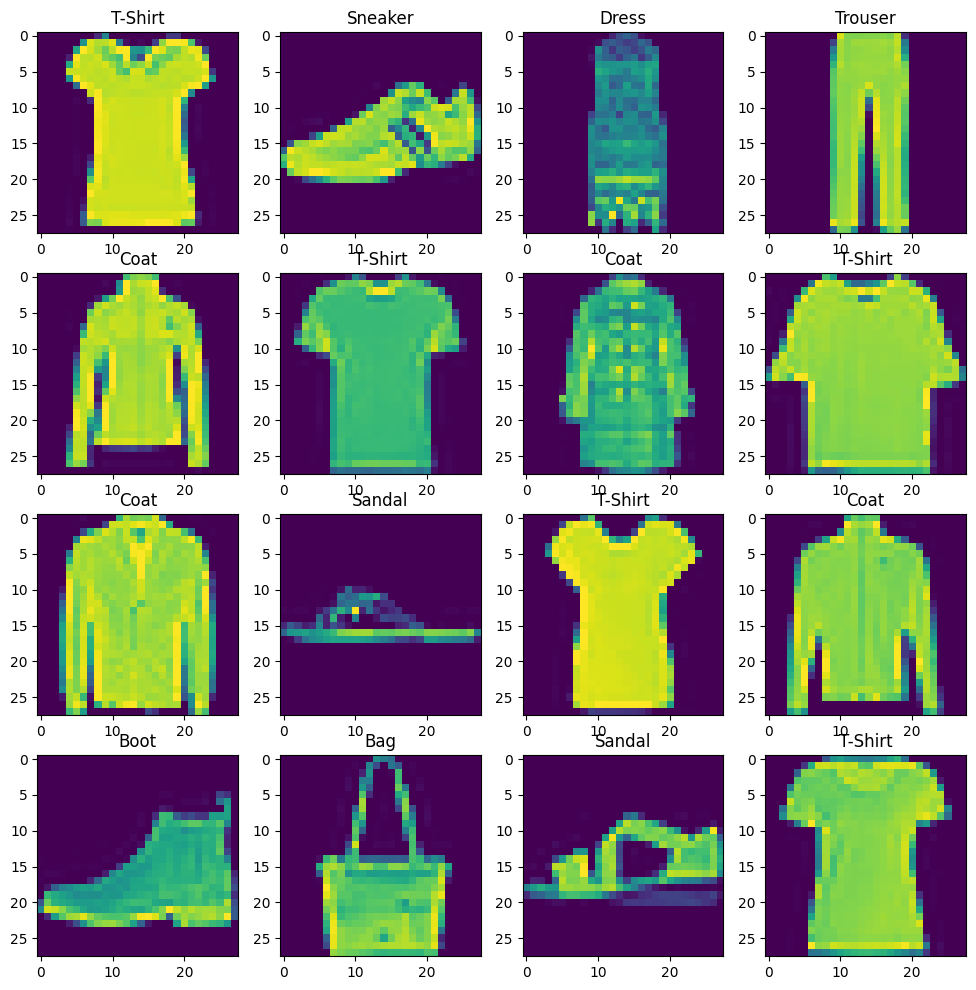

In [141]:
labels_map = {
    0:'T-Shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Boot'
}

figure = plt.figure(figsize=(12,12))
cols, rows = 4, 4
for i in range(1, cols*rows + 1):   # 1부터 16까지
    image = images[i].squeeze()     # images.shape : [128,1,28,28]
    label_idx = labels[i].item()    # labels.shape : [128]
    label = labels_map[label_idx]
    
    figure.add_subplot(rows,cols,i)
    plt.title(label)
    plt.imshow(image)
    
plt.show()

In [176]:
# 모델 정의
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet,self).__init__()
        # 컨볼루션 계층 :  특징 추출    
        self.conv1 = nn.Conv2d(1,6,3)   # 128,1,28,28 -> 128,6,26,26
        self.conv2 = nn.Conv2d(6,16,3)  # 128,16,24,24
        # 리니어 계층 : 클래스 분류
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)     # 10개의 클래스로 분류
    
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))   # input, kernel size
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = x.view(-1,self.num_flat_features(x))    # reshape()를 사용하면 복사본이 만들어질 수 있기 때문에 view()사용
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self,x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        
        return num_features

In [147]:
# shape과 size()의 차이점 : shape 
a = torch.randn(100,2)
a.shape, a.size()[:]

(torch.Size([100, 2]), torch.Size([100, 2]))

In [177]:
net = NeuralNet()
print(net)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [178]:
print(list(net.parameters()))
print(list(net.modules()))

[Parameter containing:
tensor([[[[-0.0239, -0.3202,  0.2599],
          [-0.1380, -0.2649, -0.3226],
          [-0.2838, -0.1793, -0.3263]]],


        [[[-0.0312,  0.1932,  0.2275],
          [-0.1274, -0.0840,  0.1412],
          [-0.1251, -0.1726,  0.3119]]],


        [[[-0.0618,  0.0911,  0.0205],
          [-0.2272, -0.2530, -0.1793],
          [ 0.2572, -0.0867,  0.0904]]],


        [[[ 0.1099,  0.1229,  0.2924],
          [-0.1353, -0.2897, -0.0169],
          [-0.3284, -0.2293,  0.1075]]],


        [[[-0.2483, -0.1031,  0.0838],
          [ 0.3141,  0.2933,  0.2631],
          [-0.2121, -0.2513, -0.1944]]],


        [[[-0.2329, -0.0789, -0.3075],
          [ 0.0031, -0.0439, -0.3315],
          [ 0.0434, -0.2144, -0.2132]]]], requires_grad=True), Parameter containing:
tensor([-0.0707,  0.2399, -0.1615,  0.1467, -0.2308,  0.0976],
       requires_grad=True), Parameter containing:
tensor([[[[ 4.0247e-02,  1.1066e-01,  7.6984e-02],
          [-8.4146e-02, -1.2168e-01, -1.0439e

In [179]:
print(list(net.parameters())[0].data,list(net.parameters())[0].data.grad)

tensor([[[[-0.0239, -0.3202,  0.2599],
          [-0.1380, -0.2649, -0.3226],
          [-0.2838, -0.1793, -0.3263]]],


        [[[-0.0312,  0.1932,  0.2275],
          [-0.1274, -0.0840,  0.1412],
          [-0.1251, -0.1726,  0.3119]]],


        [[[-0.0618,  0.0911,  0.0205],
          [-0.2272, -0.2530, -0.1793],
          [ 0.2572, -0.0867,  0.0904]]],


        [[[ 0.1099,  0.1229,  0.2924],
          [-0.1353, -0.2897, -0.0169],
          [-0.3284, -0.2293,  0.1075]]],


        [[[-0.2483, -0.1031,  0.0838],
          [ 0.3141,  0.2933,  0.2631],
          [-0.2121, -0.2513, -0.1944]]],


        [[[-0.2329, -0.0789, -0.3075],
          [ 0.0031, -0.0439, -0.3315],
          [ 0.0434, -0.2144, -0.2132]]]]) None


In [180]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [181]:
criterion = nn.CrossEntropyLoss()       # 클래스 분류이므로
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [166]:
total_batch = len(train_loader)
print(total_batch)  # 468번 iteration을 돔

469


In [182]:
for epoch in range(10):
    running_loss = 0.0
    
    for i, data in enumerate(train_loader):
        inputs, labels =data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()     # loss.item()을 해줘야 한다.
        
        if i % 100 == 99:
            print('Epoch: {}, iter: {}, Loss : {}'.format(epoch,i+1,running_loss))
            running_loss = 0.0

Epoch: 0, iter: 100, Loss : 229.30100059509277
Epoch: 0, iter: 200, Loss : 226.58865904808044
Epoch: 0, iter: 300, Loss : 219.0838975906372
Epoch: 0, iter: 400, Loss : 191.0051599740982
Epoch: 1, iter: 100, Loss : 95.74628907442093
Epoch: 1, iter: 200, Loss : 80.94874465465546
Epoch: 1, iter: 300, Loss : 74.83502870798111
Epoch: 1, iter: 400, Loss : 68.81911689043045
Epoch: 2, iter: 100, Loss : 68.4453841149807
Epoch: 2, iter: 200, Loss : 65.99682840704918
Epoch: 2, iter: 300, Loss : 66.02971595525742
Epoch: 2, iter: 400, Loss : 65.15533363819122
Epoch: 3, iter: 100, Loss : 63.27543920278549
Epoch: 3, iter: 200, Loss : 62.215534806251526
Epoch: 3, iter: 300, Loss : 62.20257315039635
Epoch: 3, iter: 400, Loss : 61.515516489744186
Epoch: 4, iter: 100, Loss : 58.31938672065735
Epoch: 4, iter: 200, Loss : 59.29470419883728
Epoch: 4, iter: 300, Loss : 58.36543393135071
Epoch: 4, iter: 400, Loss : 56.437827199697495
Epoch: 5, iter: 100, Loss : 56.992600083351135
Epoch: 5, iter: 200, Loss : 5

In [172]:
# nn.Conv2d, 컨볼루션 계층에 대한 이해
m = nn.Conv2d(16,33,3,stride=1,padding=1) # inchannel, outchannel, kernel
# 채널수를 16->33으로 늘린다. -> 두꺼워진다. CNN 모델의 그림을 보면 알 수 있을 것이다.
input = torch.randn(20,16,50,100)   # batch, inchannel, width, height
output = m(input)
output.shape    # 커널크기가 3이면(3,3) padding=1로 해줘야 전후 크기가 일치한다.

torch.Size([20, 33, 50, 100])

In [184]:
# 모델의 저장 및 로드
# torch.save()
# torch.load()
net.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-0.2467, -0.6681, -0.0341],
                        [-0.3868, -0.7039, -0.6019],
                        [-0.4490, -0.5384, -0.5084]]],
              
              
                      [[[-0.2389,  0.2396,  0.3910],
                        [-0.3359, -0.0283,  0.3543],
                        [-0.3323, -0.1493,  0.4674]]],
              
              
                      [[[-0.0637,  0.0939,  0.0102],
                        [-0.2341, -0.2415, -0.1829],
                        [ 0.2595, -0.0748,  0.0801]]],
              
              
                      [[[ 0.0383, -0.0138,  0.4063],
                        [-0.2313, -0.4403,  0.1166],
                        [-0.4447, -0.3969,  0.2513]]],
              
              
                      [[[-0.2587, -0.1136,  0.0663],
                        [ 0.3290,  0.3073,  0.2595],
                        [-0.2141, -0.2565, -0.2191]]],
              
              
               

In [185]:
PATH = './fashion_mnist.pth'
torch.save(net.state_dict(),PATH)

In [186]:
net = NeuralNet()   # 객체 생성
net.load_state_dict(torch.load(PATH))   # 해당 파라미터값을 객체에 적용

<All keys matched successfully>

In [188]:
list(net.parameters())

[Parameter containing:
 tensor([[[[-0.2467, -0.6681, -0.0341],
           [-0.3868, -0.7039, -0.6019],
           [-0.4490, -0.5384, -0.5084]]],
 
 
         [[[-0.2389,  0.2396,  0.3910],
           [-0.3359, -0.0283,  0.3543],
           [-0.3323, -0.1493,  0.4674]]],
 
 
         [[[-0.0637,  0.0939,  0.0102],
           [-0.2341, -0.2415, -0.1829],
           [ 0.2595, -0.0748,  0.0801]]],
 
 
         [[[ 0.0383, -0.0138,  0.4063],
           [-0.2313, -0.4403,  0.1166],
           [-0.4447, -0.3969,  0.2513]]],
 
 
         [[[-0.2587, -0.1136,  0.0663],
           [ 0.3290,  0.3073,  0.2595],
           [-0.2141, -0.2565, -0.2191]]],
 
 
         [[[-0.4213, -0.4664, -0.8239],
           [-0.1738, -0.4495, -0.8609],
           [-0.0565, -0.5023, -0.5835]]]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0233,  0.3524, -0.1815,  0.3232, -0.2027,  0.3360],
        requires_grad=True),
 Parameter containing:
 tensor([[[[ 5.3273e-02,  1.5439e-01,  1.2143e-01],
           [

In [189]:
# 모델 테스트

In [ ]:
def imshow(image):
    iamge = image/2 + 0.5
    npimg = image.numpy()
    
    